# Taura: Kikuyu-English Translation Demo

This notebook demonstrates how to use the Taura translation model for Kikuyu-English translation.

## Setup

First, let's import the necessary libraries and set up our environment.

In [1]:
import sys
import os
from pathlib import Path

# Add the src directory to the path so we can import our modules
sys.path.append('../src')

# Import our translation model
from src.models.translation_model import KikuyuEnglishTranslator
from transformers import AutoTokenizer

# Set up paths
MODELS_DIR = Path('../models')

## Load Tokenizer and Model

Now, let's load the tokenizer and a pretrained model. If you've already trained your own model, you can load that instead.

In [2]:
# Load tokenizer
tokenizer_name = "Helsinki-NLP/opus-mt-en-mul"  # Default tokenizer
tokenizer = AutoTokenizer.from_pretrained(tokenizer_name)
print(f"Loaded tokenizer: {tokenizer_name}")

# Initialize translator with a pretrained model
# Note: For real translation, you should load your trained model instead
translator = KikuyuEnglishTranslator(model_name=tokenizer_name)
print("Translator initialized")

Loaded tokenizer: Helsinki-NLP/opus-mt-en-mul
Model initialized and moved to cpu
Model parameters: 77,487,104
Translator initialized


## Load Our Dataset

Let's load and explore the Kikuyu-English dataset.

In [3]:
import pandas as pd

# Load the dataset
data_path = Path('../data/English20Kikuyu20Pairs2029.xlsx')
df = pd.read_excel(data_path)

# Display the first few rows
print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (420, 2)


,English,Kikuyu
0,Which varieties of coffee are grown in the Kenya?,Nī mīthemba īrīkū ya kahūa īkūragio gūkū Kenya?
1,SL 34 suitable for high altitude area;SL 28 at...,SL 34 īrīa īhandagūo kūndū kūrīa kūrī irīma; S...
2,"K7 suitable for low altitude area, has good ro...","K7 nīyagīraga kūndū kūrīa gūtarī igūrū mūno, ī..."
3,Ruiru 11 is suited to all coffee growing zones...,Mūthemba wa Ruiru 11 ūhandagwo kūndū guothe kū...
4,"Batian is the newest variety in the country, i...",Batian nī mūthemba ūrīa mūerū mūno būrūri-inī ...


## Data Exploration

Let's explore the dataset to understand its structure and content.

Missing values per column:
English    0
Kikuyu     0
dtype: int64

Text length statistics (characters):
English text length:
count    420.000000
mean      94.864286
std       50.583452
min       18.000000
25%       53.000000
50%       86.000000
75%      126.000000
max      293.000000
Name: english_length, dtype: float64

Kikuyu text length:
count    420.000000
mean      94.509524
std       49.540634
min       22.000000
25%       54.000000
50%       87.500000
75%      118.000000
max      314.000000
Name: kikuyu_length, dtype: float64


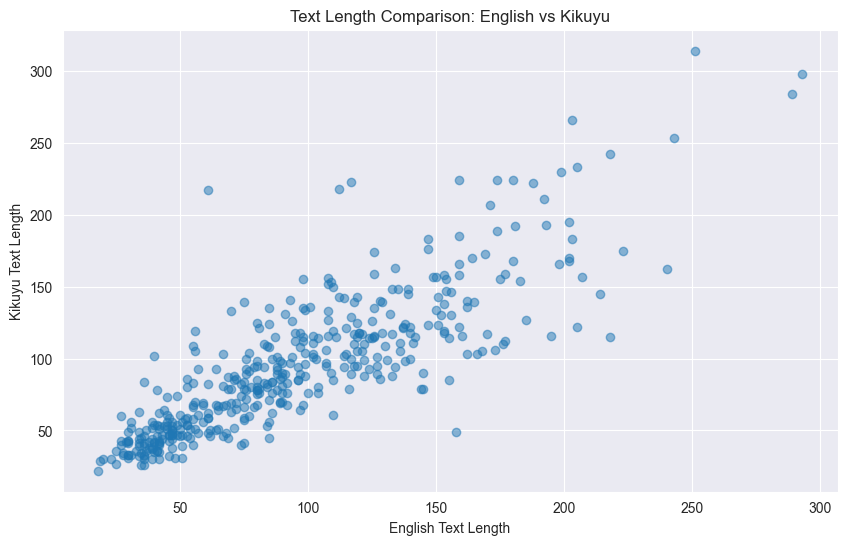

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

# Analyze text length
if 'English' in df.columns and 'Kikuyu' in df.columns:
    df['english_length'] = df['English'].astype(str).apply(len)
    df['kikuyu_length'] = df['Kikuyu'].astype(str).apply(len)
    
    print("\nText length statistics (characters):")
    print("English text length:")
    print(df['english_length'].describe())
    print("\nKikuyu text length:")
    print(df['kikuyu_length'].describe())
    
    # Visualize length distribution
    plt.figure(figsize=(10, 6))
    plt.scatter(df['english_length'], df['kikuyu_length'], alpha=0.5)
    plt.xlabel('English Text Length')
    plt.ylabel('Kikuyu Text Length')
    plt.title('Text Length Comparison: English vs Kikuyu')
    plt.show()

## Translation Demo

Now, let's demonstrate translation in both directions: English to Kikuyu and Kikuyu to English (if available).

In [5]:
def translate_text(text, lang_direction="en-to-kik"):
    """
    Translate a text between English and Kikuyu.
    
    Args:
        text (str): The text to translate
        lang_direction (str): Direction of translation ('en-to-kik' or 'kik-to-en')
        
    Returns:
        str: Translated text
    """
    if lang_direction == "en-to-kik":
        # English to Kikuyu
        return translator.translate(text, tokenizer)
    else:
        # For Kikuyu to English, we would need a different model or approach
        # This is a placeholder for now
        return "[Kikuyu to English translation not yet implemented]"

In [6]:
# English to Kikuyu examples
english_examples = [
    "Hello, how are you?",
    "What is your name?",
    "I love learning languages.",
    "Kenya is a beautiful country."
]

print("English to Kikuyu Translation Examples:")
for text in english_examples:
    translation = translate_text(text, "en-to-kik")
    print(f"English: {text}")
    print(f"Kikuyu: {translation}")
    print("---")

English to Kikuyu Translation Examples:
English: Hello, how are you?
Kikuyu: Halo, how's you?
---
English: What is your name?
Kikuyu: ./Char is your name?
---
English: I love learning languages.
Kikuyu: Like me studend languages.
---
English: Kenya is a beautiful country.
Kikuyu: Kenya is a beautiful pay.
---


In [7]:
# Try with some examples from our dataset
print("Dataset Examples:")
for i in range(min(5, len(df))):
    if 'English' in df.columns and 'Kikuyu' in df.columns:
        english_text = df.iloc[i]['English']
        kikuyu_text = df.iloc[i]['Kikuyu']
        
        print(f"English (Original): {english_text}")
        print(f"Kikuyu (Original): {kikuyu_text}")
        
        # Translate English to Kikuyu
        translated_kikuyu = translate_text(english_text, "en-to-kik")
        print(f"Kikuyu (Translated): {translated_kikuyu}")
        print("---")

Dataset Examples:
English (Original): Which varieties of coffee are grown in the Kenya?
Kikuyu (Original): Nī mīthemba īrīkū ya kahūa īkūragio gūkū Kenya?
Kikuyu (Translated): Qual sortes de kafe cultures in Kenya?
---
English (Original): SL 34 suitable for high altitude area;SL 28 at a spacing of 9ft by 9ft suitable for medium to high altitude area, has good rooting system, high yielder but susceptible to diseases.
Kikuyu (Original): SL 34 īrīa īhandagūo kūndū kūrīa kūrī irīma; SL 28 īhandagūo na ūtaganu  wa fiti kenda gwa kenda na yagīrīire kūhandwo kūndū kūrīa kūrī irīma, īkoragwo na mīri mīega, īgīaga na magetha maingī no nīinyitagwo nī mīrimū raithi.
Kikuyu (Translated): SL 34 appropriated for highhighting area; SL 28, en spaciation de 9ft per 9ft, adaptes para medium to altitude area, existing good rooting system, high producenter, men susceptible for disease.
---
English (Original): K7 suitable for low altitude area, has good rooting system, high yielder but susceptible to disea

## Interactive Translation

Let's create an interactive cell where you can input any text to translate.

In [8]:
from IPython.display import display
import ipywidgets as widgets

# Create text input and output widgets
text_input = widgets.Textarea(
    value='',
    placeholder='Enter text to translate',
    description='Input:',
    disabled=False,
    layout=widgets.Layout(width='100%', height='100px')
)

direction_dropdown = widgets.Dropdown(
    options=['English to Kikuyu', 'Kikuyu to English'],
    value='English to Kikuyu',
    description='Direction:',
    disabled=False,
)

output_text = widgets.Textarea(
    value='',
    placeholder='Translation will appear here',
    description='Output:',
    disabled=True,
    layout=widgets.Layout(width='100%', height='100px')
)

# Create a button to trigger translation
button = widgets.Button(
    description='Translate',
    disabled=False,
    button_style='primary',
    tooltip='Click to translate',
    icon='check'
)

# Define the button click event
def on_button_clicked(b):
    input_text = text_input.value
    direction = "en-to-kik" if direction_dropdown.value == "English to Kikuyu" else "kik-to-en"
    
    if input_text.strip():
        translation = translate_text(input_text, direction)
        output_text.value = translation
    else:
        output_text.value = "Please enter some text to translate."

# Connect the button click event
button.on_click(on_button_clicked)

# Display the widgets
display(text_input)
display(direction_dropdown)
display(button)
display(output_text)

Textarea(value='', description='Input:', layout=Layout(height='100px', width='100%'), placeholder='Enter text …

Dropdown(description='Direction:', options=('English to Kikuyu', 'Kikuyu to English'), value='English to Kikuy…

Button(button_style='primary', description='Translate', icon='check', style=ButtonStyle(), tooltip='Click to t…

Textarea(value='', description='Output:', disabled=True, layout=Layout(height='100px', width='100%'), placehol…

## Next Steps

Here are some next steps for improving the translation model:

1. **Train the model**: Use the training script to fine-tune a model on the Kikuyu-English dataset.
2. **Collect more data**: The more parallel data you have, the better the model will be.
3. **Evaluate performance**: Use the evaluation script to measure BLEU scores and other metrics.
4. **Add Kikuyu to English direction**: Train or adapt a model for translating in the other direction.
5. **Optimize for production**: Consider model compression techniques for deploying in resource-constrained environments.